<a href="https://colab.research.google.com/github/skyjadel/Prediction-of-quality-of-Wine/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df = pd.read_csv(url)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


根據這份資料的kaggle原始網頁，這份資料有這些欄位<br>
輸入欄位<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
然後有最後一個我們需要預測的欄位<br>
12 - quality (score between 0 and 10)


## 檢查空缺值

In [3]:
nan_num = np.sum(np.array(df.isna()))
print(f'原始資料有 {nan_num} 個空缺值')

原始資料有 0 個空缺值


## 資料分布

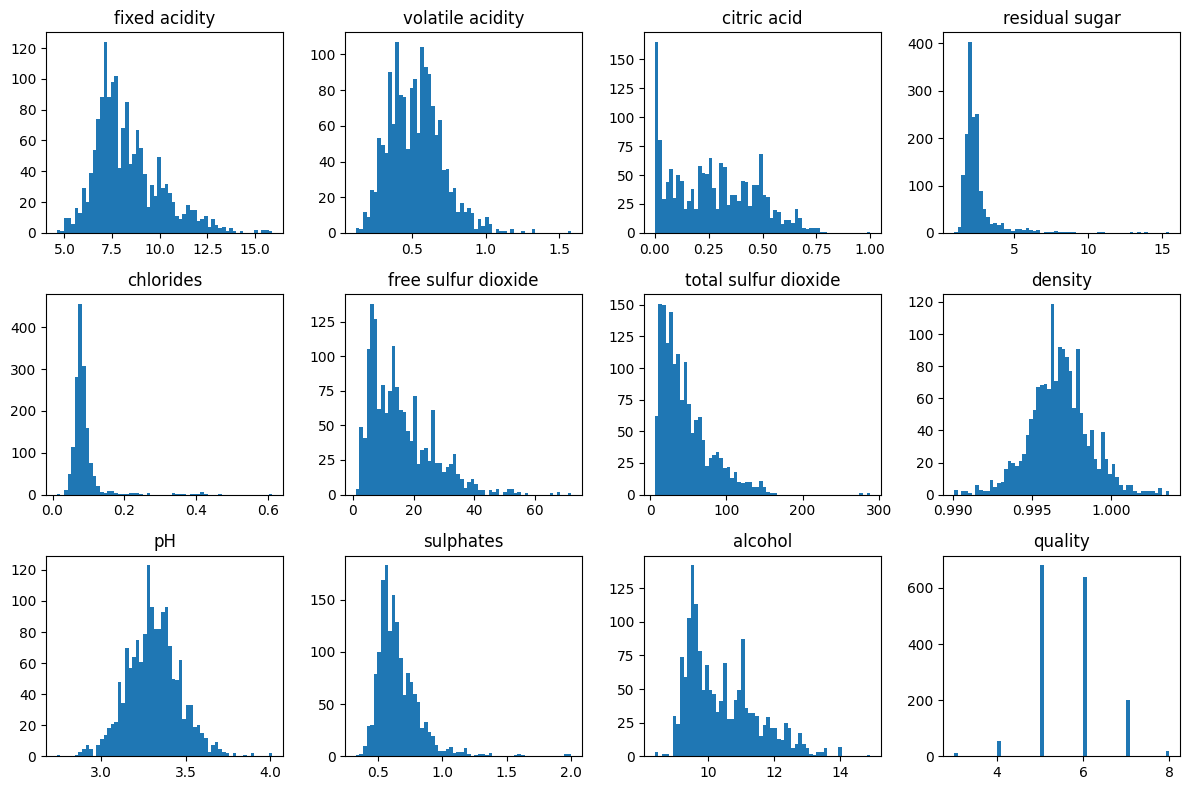

In [4]:
fig, axes = plt.subplots(3,4)
fig.set_size_inches(12,8)
for i, col in enumerate(df.columns):
  this_data = df[col]
  axes[int(i/4)][i%4].hist(df[col], 60)
  axes[int(i/4)][i%4].set_title(col)
fig.tight_layout()

輸入欄位大致可以分成以下幾種類型
1. 大致對稱的常態分布：density, pH
2. 大致對稱的常態分布加上少數數值較大的 outliers：volatile acidity, chlorides,  sulphates
3. 右偏分布：fixed acidity, residual sugar, alcohol
4. 接近 gamma distribution 的分布：citric acid, free sulfur dioxide, total sulfur dioxide

In [5]:
q = df['quality']
unique_q = sorted(list(set(q)))
q_dict = {i:0 for i in unique_q}

for j in q:
  q_dict[j] += 1

In [6]:
bar_y = [v / len(df) for v in q_dict.values()]
bar_x = q_dict.keys()

Text(0, 0.5, 'Propotion')

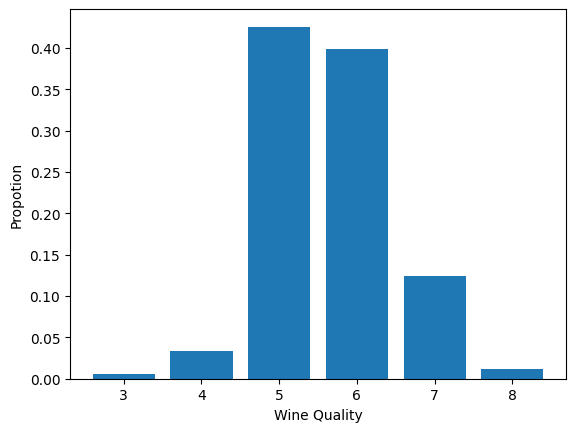

In [7]:
fig, ax = plt.subplots()
ax.bar(bar_x, bar_y)
ax.set_xlabel('Wine Quality')
ax.set_ylabel('Propotion')

In [11]:
for k, v in q_dict.items():
  print(f'{v*100/len(df):.2f}% of all samples are labeled as {k}')
print(f'Avg of wine quality score: {np.mean(q):.2f}')
print(f'Std of wine quality score: {np.std(q):.2f}')

0.63% of all samples are labeled as 3
3.31% of all samples are labeled as 4
42.59% of all samples are labeled as 5
39.90% of all samples are labeled as 6
12.45% of all samples are labeled as 7
1.13% of all samples are labeled as 8
Avg of wine quality score: 5.64
Std of wine quality score: 0.81


可以看出，有約82%的樣本被標記成品質分數為5或6，另外有12%的樣本被標記為7分，剩餘的樣本分數有3, 4, 8分<br>
平均品質分數為5.64分，標準差則是0.81分